<h1 style="color: #F70206; text-shadow: 2px 2px 4px #000000; border: 1px solid #000000; font-size: 60px; text-align: center; background-color: #A1A1A3;"> 🏎️ FORMULA 1 🏎️ </h1>



<h1 style="color: #F70206; text-shadow: 2px 2px 4px #000000; border: 1px solid #000000; font-size: 36px;">00 | First Steps </h1>

In [1]:
import plotly.express as px
import plotly.graph_objects as go
import re                                                # 🔄 Importa la biblioteca re para operaciones de expresiones regulares.
import pandas as pd                                      # 😀 Importa la biblioteca pandas y la renombra como pd para su uso en el código.
import matplotlib.pyplot as plt                          # 📊 Importa la biblioteca matplotlib.pyplot y la renombra como plt para su uso en el código.
import seaborn as sns                                    # 📈 Importa la biblioteca seaborn para gráficos estadísticos.
import numpy as np                                       # 🔢 Importa la biblioteca numpy y la renombra como np para su uso en el código.
import scipy.stats as st                                 # 🔬 Importa la biblioteca scipy.stats para distribuciones y pruebas estadísticas.
import xgboost as xgb                                    # 🚀 Importa la biblioteca xgboost para el modelado de gradient boosting.
import warnings                                          # ⚠️ Importa la biblioteca warnings para manejar advertencias.

<h4 style="color: #F70206;">Other settings</h4>

In [2]:
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_columns', None)

<h4 style="color: #F70206;">Data Extraction</h4>

In [3]:
data = pd.read_csv("GENERICO.csv")

In [4]:
data1 = pd.read_csv("constructors.csv")

<h4 style="color: #F70206;">Exploring Data </h4>

In [5]:
data

,raceId,year,circuitId,name,qualifyId,raceId.1,driverId,constructorId,number,position,q1,q2,q3,raceId.2,driverId.1,constructorId.1,grid,positionOrder,points,laps,rank,fastestLapSpeed,driverid,driverref
0,1051,2021,78,Qatar Grand Prix,9116,1051,1,131,44,1,1:21.901,1:21.682,1:20.827,1051,1,131,1,1,25.0,57,2,227.633,1,hamilton
1,1051,2021,78,Qatar Grand Prix,9117,1051,830,9,33,2,1:21.996,1:21.984,1:21.282,1051,830,9,7,2,19.0,57,1,232.799,830,max_verstappen
2,1051,2021,78,Qatar Grand Prix,9120,1051,4,214,14,5,1:22.422,1:21.894,1:21.670,1051,4,214,3,3,15.0,57,10,223.437,4,alonso
3,1051,2021,78,Qatar Grand Prix,9126,1051,815,9,11,11,1:22.398,1:22.346,\N,1051,815,9,11,4,12.0,57,3,226.227,815,perez
4,1051,2021,78,Qatar Grand Prix,9124,1051,839,214,31,9,1:22.565,1:22.012,1:22.028,1051,839,214,9,5,10.0,57,13,222.464,839,ocon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,1110,2023,13,Belgian Grand Prix,9871,1110,817,213,3,19,2:02.159,\N,\N,1110,817,213,19,16,0.0,44,15,227.169,817,ricciardo
1115,1110,2023,13,Belgian Grand Prix,9870,1110,858,3,2,18,2:01.535,\N,\N,1110,858,3,18,17,0.0,44,9,228.213,858,sargeant
1116,1110,2023,13,Belgian Grand Prix,9872,1110,807,210,27,20,2:03.166,\N,\N,1110,807,210,0,18,0.0,44,4,229.415,807,hulkenberg
1117,1110,2023,13,Belgian Grand Prix,9857,1110,832,6,55,5,1:58.688,1:51.711,1:47.152,1110,832,6,4,19,0.0,23,19,222.864,832,sainz


<h1 style="color: #F70206; text-shadow: 2px 2px 4px #000000; border: 1px solid #000000; font-size: 36px;">01 | Data Cleaning</h1>

<h4 style="color: #F70206;">Dropping useless columns </h4>

In [6]:
columns_to_drop = ['raceId', 'circuitId', 'qualifyId', 'number', 'q1', 'q2', 'q3', 'raceId.2', 'constructorId.1', 'raceId.1', "positionOrder"]
data = data.drop(columns=columns_to_drop)

<h4 style="color: #F70206;">Creating column maping </h4>

In [7]:
constructor_dict = {}
for index, row in data1.iterrows():
    constructor_dict[row['constructorId']] = row['constructorRef']
constructor_dict

{1: 'mclaren',
 2: 'bmw_sauber',
 3: 'williams',
 4: 'renault',
 5: 'toro_rosso',
 6: 'ferrari',
 7: 'toyota',
 8: 'super_aguri',
 9: 'red_bull',
 10: 'force_india',
 11: 'honda',
 12: 'spyker',
 13: 'mf1',
 14: 'spyker_mf1',
 15: 'sauber',
 16: 'bar',
 17: 'jordan',
 18: 'minardi',
 19: 'jaguar',
 20: 'prost',
 21: 'arrows',
 22: 'benetton',
 23: 'brawn',
 24: 'stewart',
 25: 'tyrrell',
 26: 'lola',
 27: 'ligier',
 28: 'forti',
 29: 'footwork',
 30: 'pacific',
 31: 'simtek',
 32: 'team_lotus',
 33: 'larrousse',
 34: 'brabham',
 35: 'dallara',
 36: 'fondmetal',
 37: 'march',
 38: 'moda',
 39: 'ags',
 40: 'lambo',
 41: 'leyton',
 42: 'coloni',
 44: 'eurobrun',
 45: 'osella',
 46: 'onyx',
 47: 'life',
 48: 'rial',
 49: 'zakspeed',
 50: 'ram',
 51: 'alfa',
 52: 'spirit',
 53: 'toleman',
 54: 'ats',
 55: 'theodore',
 56: 'fittipaldi',
 57: 'ensign',
 58: 'shadow',
 59: 'wolf',
 60: 'merzario',
 61: 'kauhsen',
 62: 'rebaque',
 63: 'surtees',
 64: 'hesketh',
 65: 'martini',
 66: 'brm',
 67: 

In [8]:
data["constructorref"] = data["constructorId"].map(constructor_dict)

In [9]:
data.columns

Index(['year', 'name', 'driverId', 'constructorId', 'position', 'driverId.1',
       'grid', 'points', 'laps', 'rank', 'fastestLapSpeed', 'driverid',
       'driverref', 'constructorref'],
      dtype='object')

<h4 style="color: #F70206;">Data Copy </h4>

In [10]:
df1 = data.copy()

<h4 style="color: #F70206;">Exploring the Final Data </h4>

In [11]:
df1

,year,name,driverId,constructorId,position,driverId.1,grid,points,laps,rank,fastestLapSpeed,driverid,driverref,constructorref
0,2021,Qatar Grand Prix,1,131,1,1,1,25.0,57,2,227.633,1,hamilton,mercedes
1,2021,Qatar Grand Prix,830,9,2,830,7,19.0,57,1,232.799,830,max_verstappen,red_bull
2,2021,Qatar Grand Prix,4,214,5,4,3,15.0,57,10,223.437,4,alonso,alpine
3,2021,Qatar Grand Prix,815,9,11,815,11,12.0,57,3,226.227,815,perez,red_bull
4,2021,Qatar Grand Prix,839,214,9,839,9,10.0,57,13,222.464,839,ocon,alpine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,2023,Belgian Grand Prix,817,213,19,817,19,0.0,44,15,227.169,817,ricciardo,alphatauri
1115,2023,Belgian Grand Prix,858,3,18,858,18,0.0,44,9,228.213,858,sargeant,williams
1116,2023,Belgian Grand Prix,807,210,20,807,0,0.0,44,4,229.415,807,hulkenberg,haas
1117,2023,Belgian Grand Prix,832,6,5,832,4,0.0,23,19,222.864,832,sainz,ferrari


<h1 style="color: #F70206; text-shadow: 2px 2px 4px #000000; border: 1px solid #000000; font-size: 36px;">01 | Data Cleaning</h1>

In [12]:
df1

,year,name,driverId,constructorId,position,driverId.1,grid,points,laps,rank,fastestLapSpeed,driverid,driverref,constructorref
0,2021,Qatar Grand Prix,1,131,1,1,1,25.0,57,2,227.633,1,hamilton,mercedes
1,2021,Qatar Grand Prix,830,9,2,830,7,19.0,57,1,232.799,830,max_verstappen,red_bull
2,2021,Qatar Grand Prix,4,214,5,4,3,15.0,57,10,223.437,4,alonso,alpine
3,2021,Qatar Grand Prix,815,9,11,815,11,12.0,57,3,226.227,815,perez,red_bull
4,2021,Qatar Grand Prix,839,214,9,839,9,10.0,57,13,222.464,839,ocon,alpine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,2023,Belgian Grand Prix,817,213,19,817,19,0.0,44,15,227.169,817,ricciardo,alphatauri
1115,2023,Belgian Grand Prix,858,3,18,858,18,0.0,44,9,228.213,858,sargeant,williams
1116,2023,Belgian Grand Prix,807,210,20,807,0,0.0,44,4,229.415,807,hulkenberg,haas
1117,2023,Belgian Grand Prix,832,6,5,832,4,0.0,23,19,222.864,832,sainz,ferrari


<h4 style="color: #F70206;">Making new dataframes filtering by year </h4>

In [13]:
df_2021 = df1[(df1['year'] == 2021)]
df_2022 = df1[(df1['year'] == 2022)]
df_2023 = df1[(df1['year'] == 2023)]

In [14]:
df_2022

,year,name,driverId,constructorId,position,driverId.1,grid,points,laps,rank,fastestLapSpeed,driverid,driverref,constructorref
439,2022,Bahrain Grand Prix,844,6,1,844,1,26.0,57,1,206.018,844,leclerc,ferrari
440,2022,Bahrain Grand Prix,832,6,3,832,3,18.0,57,3,203.501,832,sainz,ferrari
441,2022,Bahrain Grand Prix,1,131,5,1,5,15.0,57,5,202.469,1,hamilton,mercedes
442,2022,Bahrain Grand Prix,847,131,9,847,9,12.0,57,6,202.313,847,russell,mercedes
443,2022,Bahrain Grand Prix,825,210,7,825,7,10.0,57,8,201.641,825,kevin_magnussen,haas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,2022,Abu Dhabi Grand Prix,854,210,13,854,12,0.0,57,12,211.632,854,mick_schumacher,haas
875,2022,Abu Dhabi Grand Prix,825,210,16,825,16,0.0,57,20,208.556,825,kevin_magnussen,haas
876,2022,Abu Dhabi Grand Prix,1,131,5,1,5,0.0,55,11,211.738,1,hamilton,mercedes
877,2022,Abu Dhabi Grand Prix,849,3,20,849,20,0.0,55,14,210.517,849,latifi,williams


In [15]:
df_2023

,year,name,driverId,constructorId,position,driverId.1,grid,points,laps,rank,fastestLapSpeed,driverid,driverref,constructorref
879,2023,Bahrain Grand Prix,830,9,1,830,1,25.0,57,6,202.452,830,max_verstappen,red_bull
880,2023,Bahrain Grand Prix,815,9,2,815,2,18.0,57,7,202.225,815,perez,red_bull
881,2023,Bahrain Grand Prix,4,117,5,4,5,15.0,57,5,202.620,4,alonso,aston_martin
882,2023,Bahrain Grand Prix,832,6,4,832,4,12.0,57,14,200.588,832,sainz,ferrari
883,2023,Bahrain Grand Prix,1,131,7,1,7,10.0,57,10,201.802,1,hamilton,mercedes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,2023,Belgian Grand Prix,817,213,19,817,19,0.0,44,15,227.169,817,ricciardo,alphatauri
1115,2023,Belgian Grand Prix,858,3,18,858,18,0.0,44,9,228.213,858,sargeant,williams
1116,2023,Belgian Grand Prix,807,210,20,807,0,0.0,44,4,229.415,807,hulkenberg,haas
1117,2023,Belgian Grand Prix,832,6,5,832,4,0.0,23,19,222.864,832,sainz,ferrari


<h1 style="color: #F70206; text-shadow: 2px 2px 4px #000000; border: 1px solid #000000; font-size: 36px;">02 | EDA </h1>

<h4 style="color: #F70206;">Grouping by constructor </h4>

In [16]:
grouped_data_2021 = df_2021.groupby(['constructorref', 'driverref']).size().reset_index(name='count')
grouped_data_2022 = df_2022.groupby(['constructorref', 'driverref']).size().reset_index(name='count')
grouped_data_2023 = df_2023.groupby(['constructorref', 'driverref']).size().reset_index(name='count')

In [17]:
grouped_data_2021 = grouped_data_2021.set_index('constructorref')
grouped_data_2022 = grouped_data_2022.set_index('constructorref')
grouped_data_2023 = grouped_data_2023.set_index('constructorref')

In [18]:
grouped_data_2021

,driverref,count
constructorref,,
alfa,giovinazzi,22
alfa,kubica,2
alfa,raikkonen,20
alphatauri,gasly,22
alphatauri,tsunoda,22
alpine,alonso,22
alpine,ocon,22
aston_martin,stroll,22
aston_martin,vettel,22


In [19]:
grouped_data_2022

,driverref,count
constructorref,,
alfa,bottas,22
alfa,zhou,22
alphatauri,gasly,22
alphatauri,tsunoda,22
alpine,alonso,22
alpine,ocon,22
aston_martin,hulkenberg,2
aston_martin,stroll,22
aston_martin,vettel,20


In [20]:
grouped_data_2023

,driverref,count
constructorref,,
alfa,bottas,12
alfa,zhou,12
alphatauri,de_vries,10
alphatauri,ricciardo,2
alphatauri,tsunoda,12
alpine,gasly,12
alpine,ocon,12
aston_martin,alonso,12
aston_martin,stroll,12


<h4 style="color: #F70206;">Plotting teams mean position by year</h4>

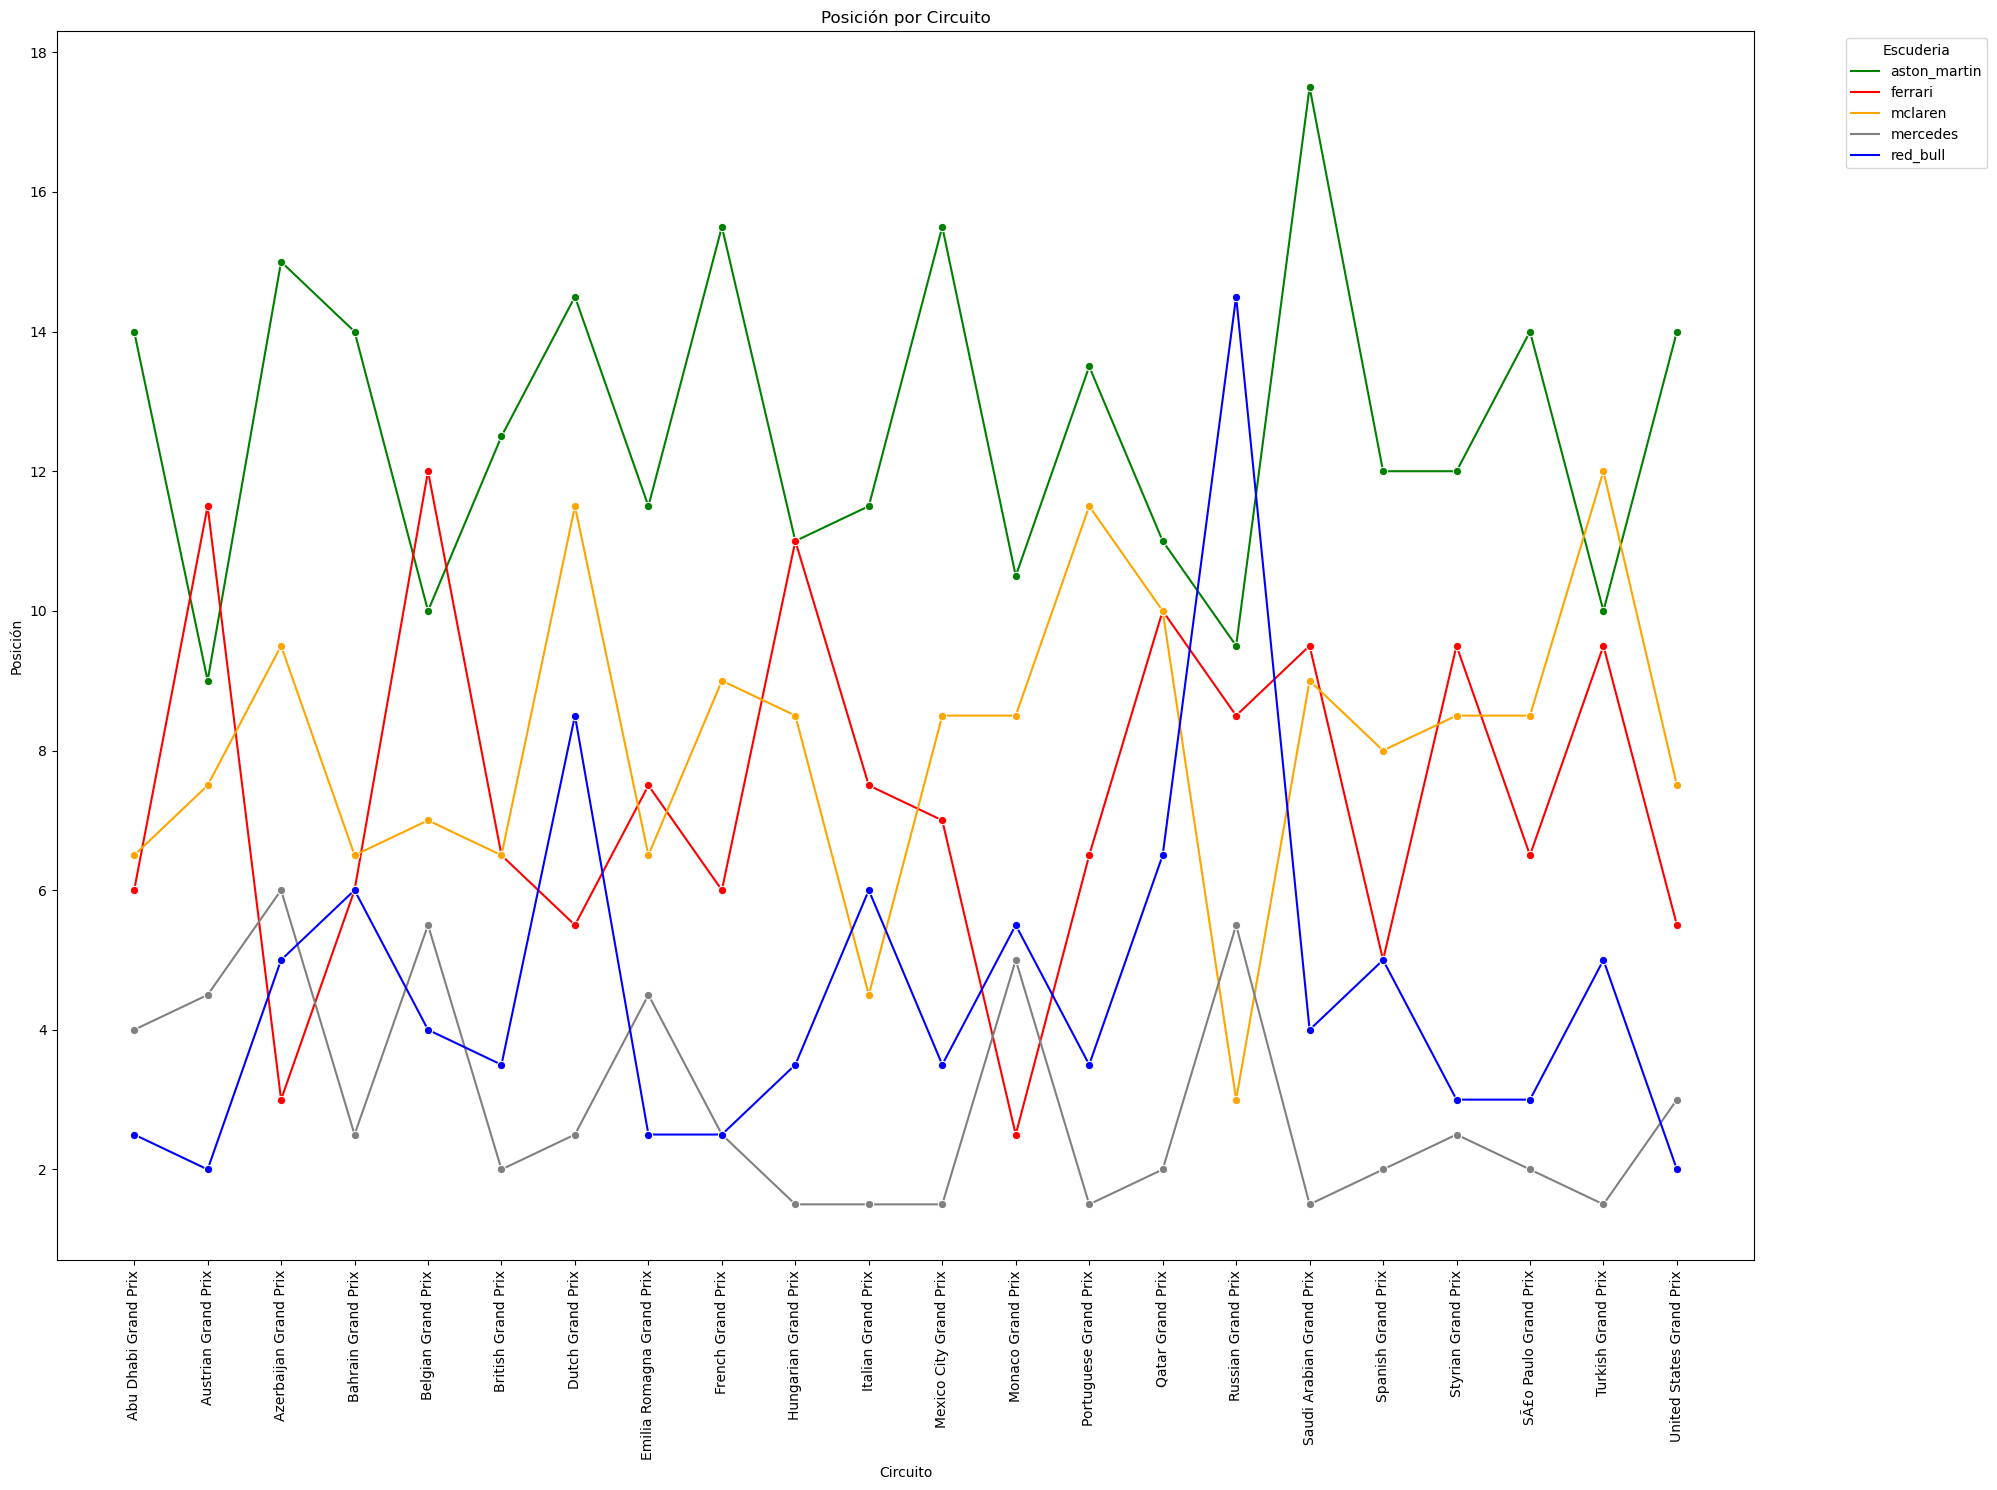

In [21]:
df_constructors = df1[(df1['constructorref'].isin(["ferrari", "aston_martin", "mercedes", "red_bull", "mclaren"]) & (df1['year'] == 2021))].groupby(['constructorref', 'name', 'year'])['position'].mean()
df_constructors = pd.DataFrame(df_constructors)
plt.figure(figsize=(20, 15))
custom = ['green', 'red', 'orange', 'grey', 'blue']
sns.lineplot(data=df_constructors, x='name', y='position', hue='constructorref', marker='o', ci=None, palette=custom)
plt.title('Posición por Circuito')
plt.xlabel('Circuito')
plt.ylabel('Posición')
plt.xticks(rotation=90)
plt.legend(title='Escuderia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

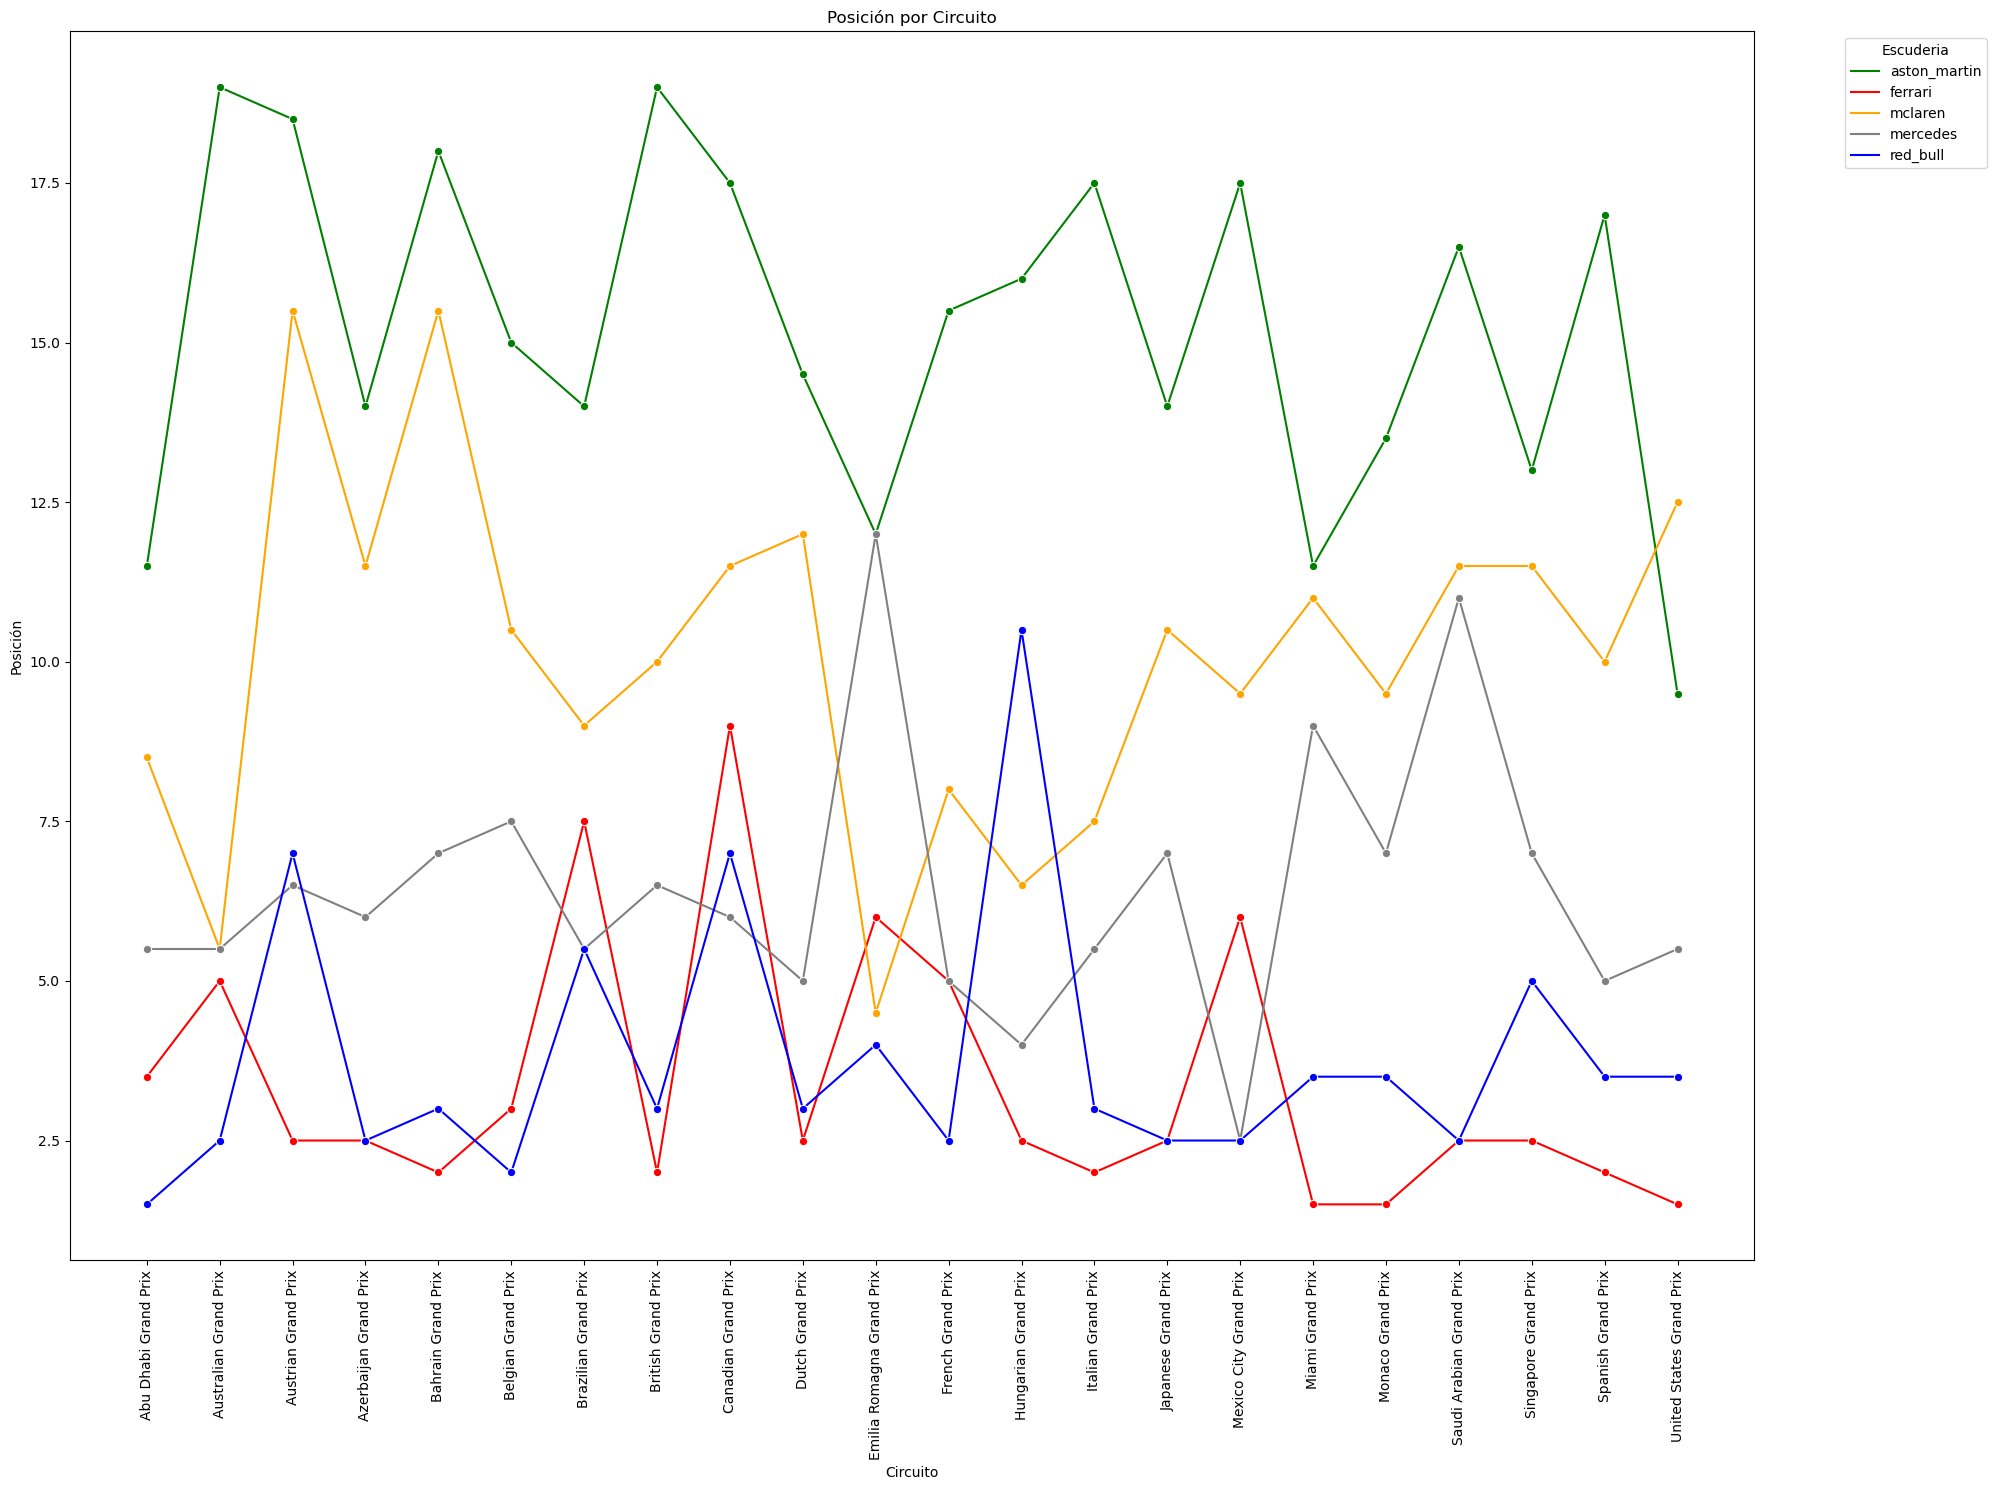

In [22]:
df_constructors = df1[(df1['constructorref'].isin(["ferrari", "aston_martin", "mercedes", "red_bull", "mclaren"]) & (df1['year'] == 2022))].groupby(['constructorref', 'name', 'year'])['position'].mean()
df_constructors = pd.DataFrame(df_constructors)
plt.figure(figsize=(20, 15))
custom = ['green', 'red', 'orange', 'grey', 'blue']
sns.lineplot(data=df_constructors, x='name', y='position', hue='constructorref', marker='o', ci=None, palette=custom)
plt.title('Posición por Circuito')
plt.xlabel('Circuito')
plt.ylabel('Posición')
plt.xticks(rotation=90)
plt.legend(title='Escuderia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

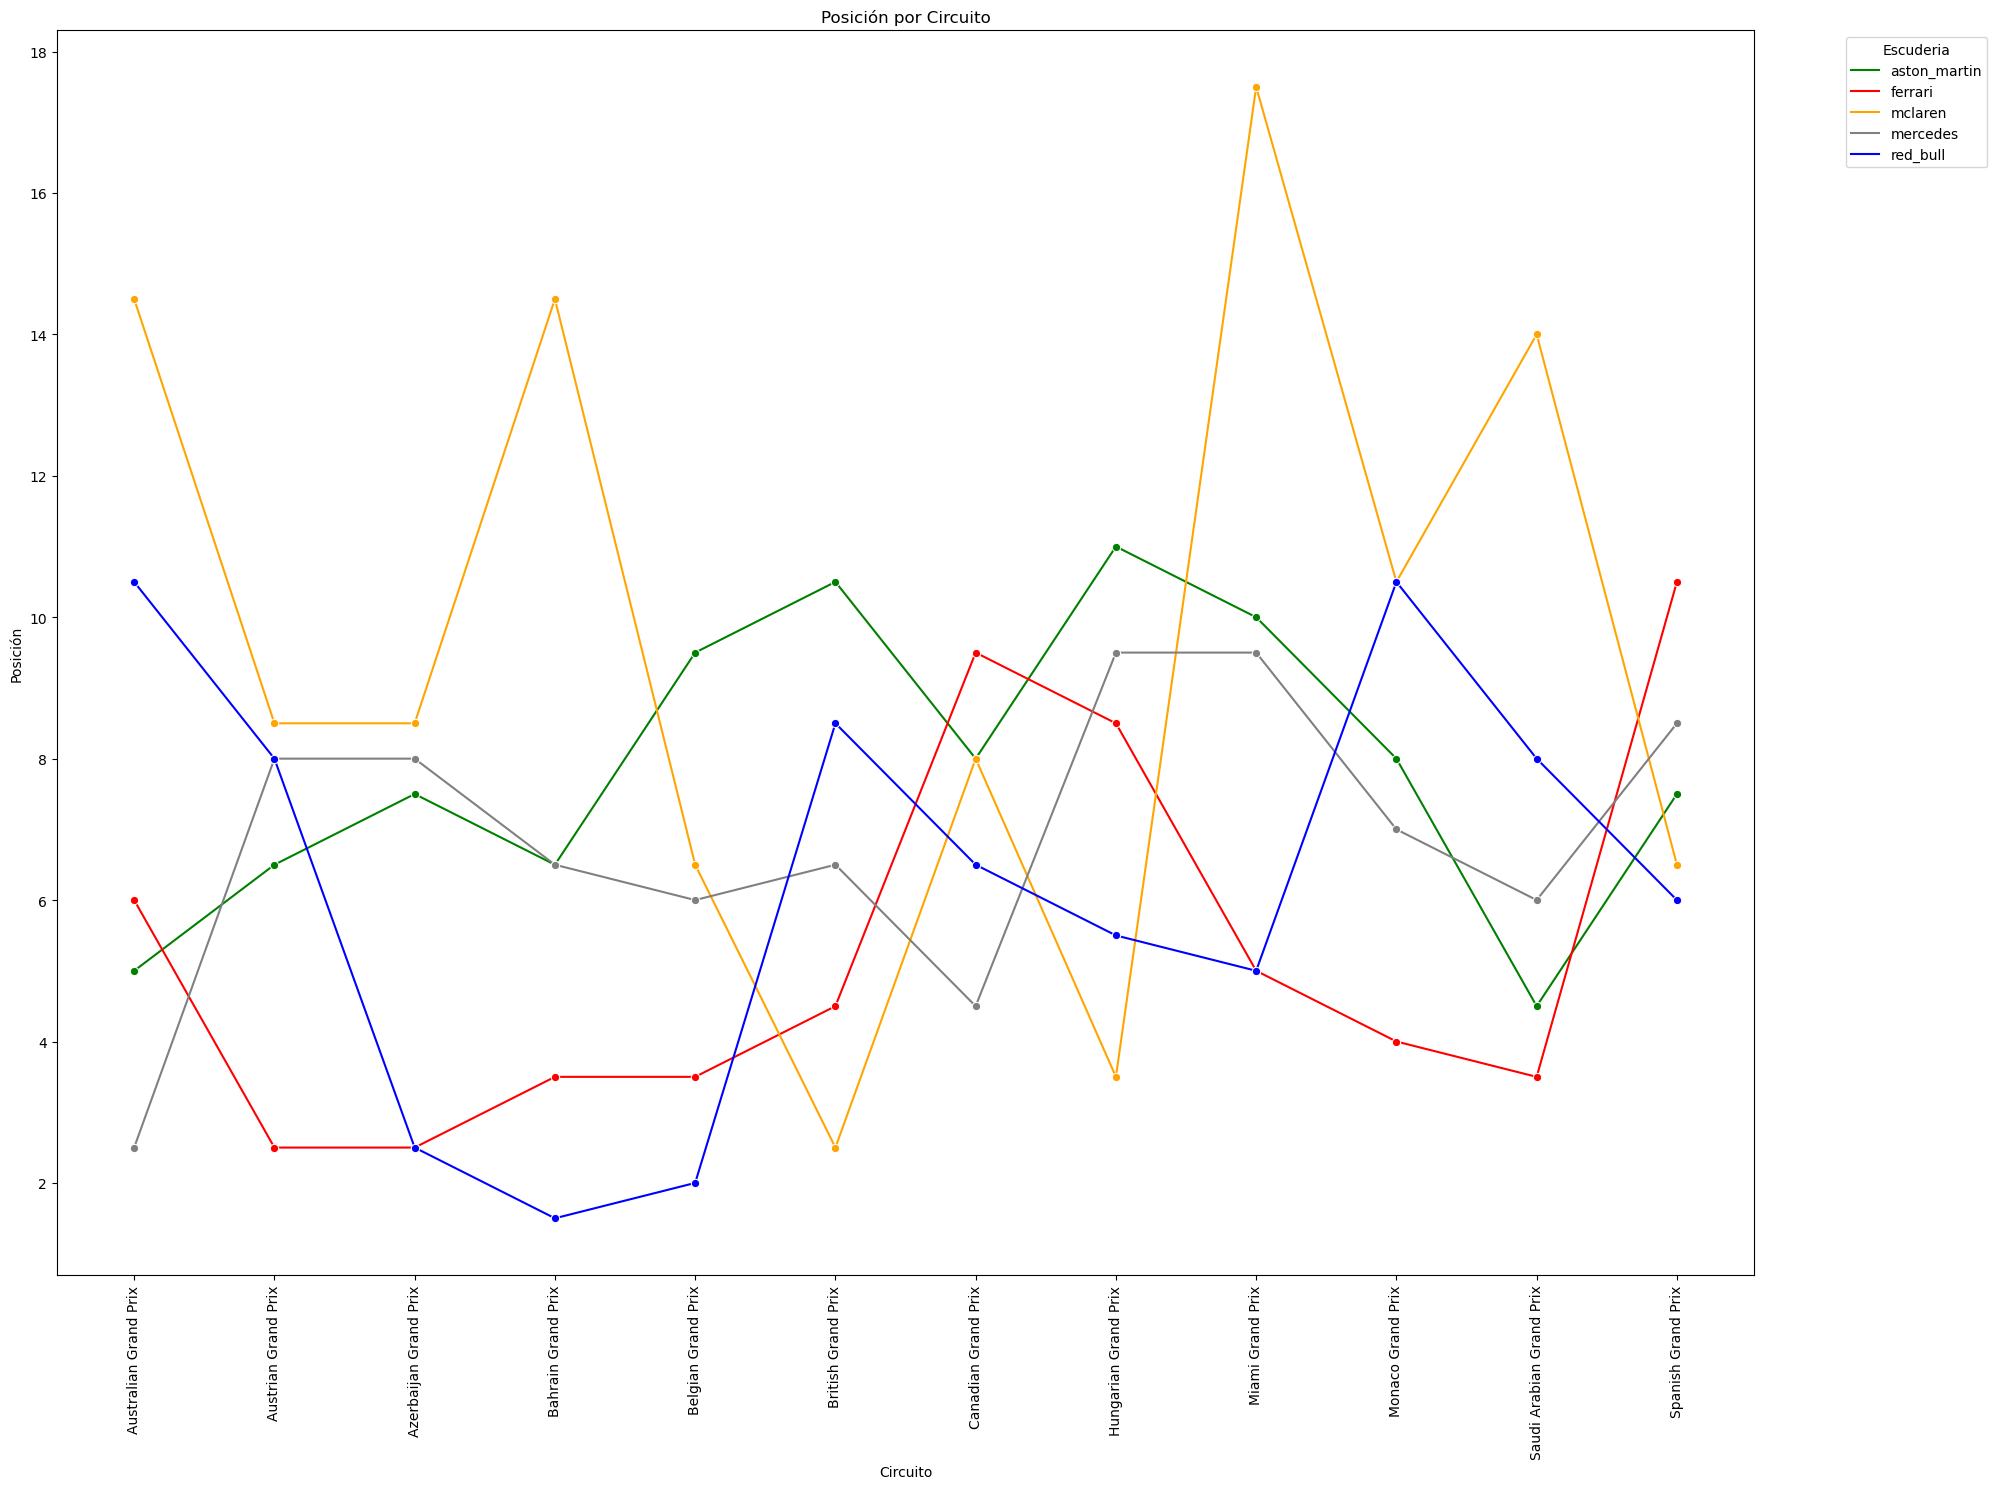

In [23]:
df_constructors = df1[(df1['constructorref'].isin(["ferrari", "aston_martin", "mercedes", "red_bull", "mclaren"]) & (df1['year'] == 2023))].groupby(['constructorref', 'name', 'year'])['position'].mean()
df_constructors = pd.DataFrame(df_constructors)
plt.figure(figsize=(20, 15))
custom = ['green', 'red', 'orange', 'grey', 'blue']
sns.lineplot(data=df_constructors, x='name', y='position', hue='constructorref', marker='o', ci=None, palette=custom)
plt.title('Posición por Circuito')
plt.xlabel('Circuito')
plt.ylabel('Posición')
plt.xticks(rotation=90)
plt.legend(title='Escuderia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<h4 style="color: #F70206;">Plotting Alonso VS Verstappen positions</h4>

In [24]:

df_2021 = df1[df1["driverref"].isin(["alonso", "max_verstappen"])]
custom1 = ["blue"<h4 style="color: #F70206;">Exploring the Final Data </h4>e=(20, 10))
for year in df_2021['year'].unique():
    count += 1
    if count == 1:
        sns.lineplot(data=df_2021[df_2021['year'] == year], x='name', y='position', hue='driverref', palette=custom1, marker='o', ci=None)
    elif count == 2:
        sns.lineplot(data=df_2021[df_2021['year'] == year], x='name', y='position', hue='driverref', palette=custom2, marker='o', ci=None)
    else:
        sns.lineplot(data=df_2021[df_2021['year'] == year], x='name', y='position', hue='driverref', palette=custom3, marker='o', ci=None)

# Ajustes de estilo y etiquetas
plt.title('Posición por Circuito')
plt.xlabel('Circuito')
plt.ylabel('Posición')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mayor legibilidad
plt.legend(title='Piloto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (3944416956.py, line 2)

<h4 style="color: #F70206;">Plotting Alonso VS Verstappen grids</h4>

In [ ]:

df_2021 = df1[df1["driverref"].isin(["alonso", "max_verstappen"])]
custom1 = ["blue", "#EE82EE"]
custom2 = ["#FF1493", "#1E90FF"]
custom3 = ["#6495ED", "green"]
count = 0
plt.figure(figsize=(20, 10))
for year in df_2021['year'].unique():
    count += 1
    if count == 1:
        sns.lineplot(data=df_2021[df_2021['year'] == year], x='name', y='grid', hue='driverref', palette=custom1, marker='o', ci=None)
    elif count == 2:
        sns.lineplot(data=df_2021[df_2021['year'] == year], x='name', y='grid', hue='driverref', palette=custom2, marker='o', ci=None)
    else:
        sns.lineplot(data=df_2021[df_2021['year'] == year], x='name', y='grid', hue='driverref', palette=custom3, marker='o', ci=None)

# Ajustes de estilo y etiquetas
plt.title('Grid por Circuito')
plt.xlabel('Circuito')
plt.ylabel('Grid')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mayor legibilidad
plt.legend(title='Piloto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
<h4 style="color: #F70206;">Plotting Sainz VS Leclerc positions</h4>

In [ ]:
df_2021 = df1[df1["driverref"].isin(["sainz", "leclerc"])]
custom1 = ["#F40707", "black"]
custom2 = ["#565601", "#F76262"]
custom3 = ["#F9A7A7", "#8E8E02"]
count = 0
plt.figure(figsize=(20, 10))
for year in df_2021['year'].unique():
    count += 1
    if count == 1:
        sns.lineplot(data=df_2021[df_2021['year'] == year], x='name', y='grid', hue='driverref', palette=custom1, marker='o', ci=None)
    elif count == 2:
        sns.lineplot(data=df_2021[df_2021['year'] == year], x='name', y='grid', hue='driverref', palette=custom2, marker='o', ci=None)
    else:
        sns.lineplot(data=df_2021[df_2021['year'] == year], x='name', y='grid', hue='driverref', palette=custom3, marker='o', ci=None)

# Ajustes de estilo y etiquetas
plt.title('Posición por Circuito')
plt.xlabel('Circuito')
plt.ylabel('Posición')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mayor legibilidad
plt.legend(title='Piloto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
<h4 style="color: #F70206;">Plotting Sainz VS Leclerc grids</h4>

In [ ]:
df_2021 = df1[df1["driverref"].isin(["sainz", "leclerc"])]
custom1 = ["#F40707", "black"]
custom2 = ["#565601", "#F76262"]
custom3 = ["#F9A7A7", "#8E8E02"]
count = 0
plt.figure(figsize=(20, 10))
for year in df_2021['year'].unique():
    count += 1
    if count == 1:
        sns.lineplot(data=df_2021[df_2021['year'] == year], x='name', y='grid', hue='driverref', palette=custom1, marker='o', ci=None)
    elif count == 2:
        sns.lineplot(data=df_2021[df_2021['year'] == year], x='name', y='grid', hue='driverref', palette=custom2, marker='o', ci=None)
    else:
        sns.lineplot(data=df_2021[df_2021['year'] == year], x='name', y='grid', hue='driverref', palette=custom3, marker='o', ci=None)

# Ajustes de estilo y etiquetas
plt.title('Grid por Circuito')
plt.xlabel('Circuito')
plt.ylabel('grid')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mayor legibilidad
plt.legend(title='Piloto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
<h4 style="color: #F70206;">Plotting Hamilton VS Norris positions</h4>

In [ ]:
df_2021 = df1[df1["driverref"].isin(["hamilton", "norris"])]
custom1 = ["#696969", "#FF8C00"]
custom2 = ["#A9A9A9", "#F4A460"]
custom3 = ["#000000", "#FFDAB9"]
count = 0
plt.figure(figsize=(20, 10))
for year in df_2021['year'].unique():
    count += 1
    if count == 1:
        sns.lineplot(data=df_2021[df_2021['year'] == year], x='name', y='grid', hue='driverref', palette=custom1, marker='o', ci=None)
    elif count == 2:
        sns.lineplot(data=df_2021[df_2021['year'] == year], x='name', y='grid', hue='driverref', palette=custom2, marker='o', ci=None)
    else:
        sns.lineplot(data=df_2021[df_2021['year'] == year], x='name', y='grid', hue='driverref', palette=custom3, marker='o', ci=None)

# Ajustes de estilo y etiquetas
plt.title('Posición por Circuito')
plt.xlabel('Circuito')
plt.ylabel('Posición')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mayor legibilidad
plt.legend(title='Piloto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<h4 style="color: #F70206;">Plotting Hamilton VS Norris grids</h4>

In [ ]:
df_2021 = df1[df1["driverref"].isin(["hamilton", "norris"])]
custom1 = ["#696969", "#FF8C00"]
custom2 = ["#A9A9A9", "#F4A460"]
custom3 = ["#000000", "#FFDAB9"]
count = 0
plt.figure(figsize=(20, 10))
for year in df_2021['year'].unique():
    count += 1
    if count == 1:
        sns.lineplot(data=df_2021[df_2021['year'] == year], x='name', y='grid', hue='driverref', palette=custom1, marker='o', ci=None)
    elif count == 2:
        sns.lineplot(data=df_2021[df_2021['year'] == year], x='name', y='grid', hue='driverref', palette=custom2, marker='o', ci=None)
    else:
        sns.lineplot(data=df_2021[df_2021['year'] == year], x='name', y='grid', hue='driverref', palette=custom3, marker='o', ci=None)

# Ajustes de estilo y etiquetas
plt.title('Grid por Circuito')
plt.xlabel('Circuito')
plt.ylabel('Grid')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mayor legibilidad
plt.legend(title='Piloto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<h4 style="color: #F70206;">Making new dataframes filtering first dataframe by selected drivers</h4>

In [ ]:
df_2021_top = df1[(df1['year'] == 2021) & (df1["driverref"].isin(["alonso", "sainz", "max_verstappen",
                                                                  "hamilton", "leclerc", "norris"]))]
df_2022_top = df1[(df1['year'] == 2022) & (df1["driverref"].isin(["alonso", "sainz", "max_verstappen",
                                                                  "hamilton", "leclerc", "norris"]))]
df_2023_top = df1[(df1['year'] == 2023) & (df1["driverref"].isin(["alonso", "sainz", "max_verstappen",
                                                                  "hamilton", "leclerc", "norris"]))]

<h4 style="color: #F70206;">Plotting Alonso position and data describe</h4>

In [ ]:
posiciones_alonso1 = df_2021_top[df_2021_top['driverref'] == 'alonso'][['year', 'position']]
posiciones_alonso2 = df_2022_top[df_2022_top['driverref'] == 'alonso'][['year', 'position']]
posiciones_alonso3 = df_2023_top[df_2023_top['driverref'] == 'alonso'][['year', 'position']]
posiciones_alonso = df1[df1['driverref'] == 'alonso'][['year', 'position']].sort_values(by='year')
tabla1 = pd.concat([posiciones_alonso1, posiciones_alonso2, posiciones_alonso3])
print(round(tabla1.describe(),0))
tabla1 = tabla1.groupby('year')['position'].value_counts()
sns.set_style("whitegrid")

# Definir el diccionario de colores
custom_palette = {2021: '#00BFFF', 2022: '#FF00FF', 2023: 'green'}

# Crear el histograma
plt.figure(figsize=(12, 8))
sns.histplot(data=tabla1, x='position', hue='year', multiple='stack', palette=custom_palette, shrink=0.8, binwidth=1)
plt.title('Histograma de Posiciones por Año')
plt.xlabel('Posición')
plt.ylabel('Frecuencia')
plt.show()

<h4 style="color: #F70206;">Plotting Sainz position and data describe</h4>

In [ ]:
posiciones_alonso1 = df_2021_top[df_2021_top['driverref'] == 'sainz'][['year', 'position']]
posiciones_alonso2 = df_2022_top[df_2022_top['driverref'] == 'sainz'][['year', 'position']]
posiciones_alonso3 = df_2023_top[df_2023_top['driverref'] == 'sainz'][['year', 'position']]
posiciones_alonso = df1[df1['driverref'] == 'sainz'][['year', 'position']].sort_values(by='year')
tabla1 = pd.concat([posiciones_alonso1, posiciones_alonso2, posiciones_alonso3])
print(round(tabla1.describe(),0))
tabla1 = tabla1.groupby('year')['position'].value_counts()
sns.set_style("whitegrid")

# Definir el diccionario de colores
custom_palette = {2021: '#F70206', 2022: '#F28282', 2023: '#F9590E'}

# Crear el histograma
plt.figure(figsize=(12, 8))
sns.histplot(data=tabla1, x='position', hue='year', multiple='stack', palette=custom_palette, shrink=0.8, binwidth=1)
plt.title('Histograma de Posiciones por Año')
plt.xlabel('Posición')
plt.ylabel('Frecuencia')
plt.show()

<h4 style="color: #F70206;">Plotting Verstappen position and data describe</h4>

In [ ]:
posiciones_alonso1 = df_2021_top[df_2021_top['driverref'] == 'max_verstappen'][['year', 'position']]
posiciones_alonso2 = df_2022_top[df_2022_top['driverref'] == 'max_verstappen'][['year', 'position']]
posiciones_alonso3 = df_2023_top[df_2023_top['driverref'] == 'max_verstappen'][['year', 'position']]
posiciones_alonso = df1[df1['driverref'] == 'max_verstappen'][['year', 'position']].sort_values(by='year')
tabla1 = pd.concat([posiciones_alonso1, posiciones_alonso2, posiciones_alonso3])
print(round(tabla1.describe(),0))
tabla1 = tabla1.groupby('year')['position'].value_counts()
sns.set_style("whitegrid")

# Definir el diccionario de colores
custom_palette = {2021: '#00BFFF', 2022: 'blue', 2023: '#0000CD'}

# Crear el histograma
plt.figure(figsize=(12, 8))
sns.histplot(data=tabla1, x='position', hue='year', multiple='stack', palette=custom_palette, shrink=0.8, binwidth=1)
plt.title('Histograma de Posiciones por Año')
plt.xlabel('Posición')
plt.ylabel('Frecuencia')
plt.show()

<h4 style="color: #F70206;">Plotting Hamilton position and data describe</h4>

In [ ]:
posiciones_alonso1 = df_2021_top[df_2021_top['driverref'] == 'hamilton'][['year', 'position']]
posiciones_alonso2 = df_2022_top[df_2022_top['driverref'] == 'hamilton'][['year', 'position']]
posiciones_alonso3 = df_2023_top[df_2023_top['driverref'] == 'hamilton'][['year', 'position']]
posiciones_alonso = df1[df1['driverref'] == 'hamilton'][['year', 'position']].sort_values(by='year')
tabla1 = pd.concat([posiciones_alonso1, posiciones_alonso2, posiciones_alonso3])
print(round(tabla1.describe(),0))
tabla1 = tabla1.groupby('year')['position'].value_counts()
sns.set_style("whitegrid")

# Definir el diccionario de colores
custom_palette = {2021: '#696969', 2022: '#A9A9A9', 2023: '#000000'}

# Crear el histograma
plt.figure(figsize=(12, 8))
sns.histplot(data=tabla1, x='position', hue='year', multiple='stack', palette=custom_palette, shrink=0.8, binwidth=1)
plt.title('Histograma de Posiciones por Año')
plt.xlabel('Posición')
plt.ylabel('Frecuencia')
plt.show()

<h4 style="color: #F70206;">Plotting Leclerc position and data describe</h4>

In [ ]:
posiciones_alonso1 = df_2021_top[df_2021_top['driverref'] == 'leclerc'][['year', 'position']]
posiciones_alonso2 = df_2022_top[df_2022_top['driverref'] == 'leclerc'][['year', 'position']]
posiciones_alonso3 = df_2023_top[df_2023_top['driverref'] == 'leclerc'][['year', 'position']]
posiciones_alonso = df1[df1['driverref'] == 'leclerc'][['year', 'position']].sort_values(by='year')
tabla1 = pd.concat([posiciones_alonso1, posiciones_alonso2, posiciones_alonso3])
print(round(tabla1.describe(),0))
tabla1 = tabla1.groupby('year')['position'].value_counts()
sns.set_style("whitegrid")

# Definir el diccionario de colores
custom_palette = {2021: '#F70206', 2022: '#F28282', 2023: '#F9590E'}

# Crear el histograma
plt.figure(figsize=(12, 8))
sns.histplot(data=tabla1, x='position', hue='year', multiple='stack', palette=custom_palette, shrink=0.8, binwidth=1)
plt.title('Histograma de Posiciones por Año')
plt.xlabel('Posición')
plt.ylabel('Frecuencia')
plt.show()

<h4 style="color: #F70206;">Plotting Norris position and data describe</h4>

In [ ]:
posiciones_alonso1 = df_2021_top[df_2021_top['driverref'] == 'norris'][['year', 'position']]
posiciones_alonso2 = df_2022_top[df_2022_top['driverref'] == 'norris'][['year', 'position']]
posiciones_alonso3 = df_2023_top[df_2023_top['driverref'] == 'norris'][['year', 'position']]
posiciones_alonso = df1[df1['driverref'] == 'norris'][['year', 'position']].sort_values(by='year')
tabla1 = pd.concat([posiciones_alonso1, posiciones_alonso2, posiciones_alonso3])
print(round(tabla1.describe(),0))
tabla1 = tabla1.groupby('year')['position'].value_counts()
sns.set_style("whitegrid")

# Definir el diccionario de colores
custom_palette = {2021: '#FF8C00', 2022: '#F4A460', 2023: '#FFDAB9'}

# Crear el histograma
plt.figure(figsize=(12, 8))
sns.histplot(data=tabla1, x='position', hue='year', multiple='stack', palette=custom_palette, shrink=0.8, binwidth=1)
plt.title('Histograma de Posiciones por Año')
plt.xlabel('Posición')
plt.ylabel('Frecuencia')
plt.show()

<h4 style="color: #F70206;">Plotting Alonso grid and data describe</h4>

In [ ]:
posiciones_alonso1 = df_2021_top[df_2021_top['driverref'] == 'alonso'][['year', 'grid']]
posiciones_alonso2 = df_2022_top[df_2022_top['driverref'] == 'alonso'][['year', 'grid']]
posiciones_alonso3 = df_2023_top[df_2023_top['driverref'] == 'alonso'][['year', 'grid']]
tabla1 = pd.concat([posiciones_alonso1, posiciones_alonso2, posiciones_alonso3])
print(round(tabla1.describe(),0))
tabla1 = tabla1.groupby('year')['grid'].value_counts()
tabla1
sns.set_style("whitegrid")

# Definir el diccionario de colores
custom_palette = {2021: '#00BFFF', 2022: '#FF00FF', 2023: 'green'}

# Crear el histograma
plt.figure(figsize=(12, 8))
sns.histplot(data=tabla1, x='grid', hue='year', multiple='stack', palette=custom_palette, shrink=0.8, binwidth=1)
plt.title('Histograma de grid por Año')
plt.xlabel('grid')
plt.ylabel('Frecuencia')
plt.show()

<h4 style="color: #F70206;">Plotting Sainz grid and data describe</h4>

In [ ]:
posiciones_alonso1 = df_2021_top[df_2021_top['driverref'] == 'sainz'][['year', 'grid']]
posiciones_alonso2 = df_2022_top[df_2022_top['driverref'] == 'sainz'][['year', 'grid']]
posiciones_alonso3 = df_2023_top[df_2023_top['driverref'] == 'sainz'][['year', 'grid']]
tabla1 = pd.concat([posiciones_alonso1, posiciones_alonso2, posiciones_alonso3])
print(round(tabla1.describe(),0))
tabla1 = tabla1.groupby('year')['grid'].value_counts()
tabla1
sns.set_style("whitegrid")

# Definir el diccionario de colores
custom_palette = {2021: '#F70206', 2022: '#F28282', 2023: '#F9590E'}

# Crear el histograma
plt.figure(figsize=(12, 8))
sns.histplot(data=tabla1, x='grid', hue='year', multiple='stack', palette=custom_palette, shrink=0.8, binwidth=1)
plt.title('Histograma de grid por Año')
plt.xlabel('grid')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
<h4 style="color: #F70206;">Plotting Verstappen grid and data describe</h4>

In [ ]:
posiciones_alonso1 = df_2021_top[df_2021_top['driverref'] == 'max_verstappen'][['year', 'grid']]
posiciones_alonso2 = df_2022_top[df_2022_top['driverref'] == 'max_verstappen'][['year', 'grid']]
posiciones_alonso3 = df_2023_top[df_2023_top['driverref'] == 'max_verstappen'][['year', 'grid']]
tabla1 = pd.concat([posiciones_alonso1, posiciones_alonso2, posiciones_alonso3])
print(round(tabla1.describe(),0))
tabla1 = tabla1.groupby('year')['grid'].value_counts()
tabla1
sns.set_style("whitegrid")

# Definir el diccionario de colores
custom_palette = {2021: '#00BFFF', 2022: 'blue', 2023: '#0000CD'}

# Crear el histograma
plt.figure(figsize=(12, 8))
sns.histplot(data=tabla1, x='grid', hue='year', multiple='stack', palette=custom_palette, shrink=0.8, binwidth=1)
plt.title('Histograma de grid por Año')
plt.xlabel('grid')
plt.ylabel('Frecuencia')
plt.show()

<h4 style="color: #F70206;">Plotting Hamilton grid and data describe</h4>

In [ ]:
posiciones_alonso1 = df_2021_top[df_2021_top['driverref'] == 'hamilton'][['year', 'grid']]
posiciones_alonso2 = df_2022_top[df_2022_top['driverref'] == 'hamilton'][['year', 'grid']]
posiciones_alonso3 = df_2023_top[df_2023_top['driverref'] == 'hamilton'][['year', 'grid']]
tabla1 = pd.concat([posiciones_alonso1, posiciones_alonso2, posiciones_alonso3])
print(round(tabla1.describe(),0))
tabla1 = tabla1.groupby('year')['grid'].value_counts()
tabla1
sns.set_style("whitegrid")

# Definir el diccionario de colores
custom_palette = {2021: '#696969', 2022: '#A9A9A9', 2023: '#000000'}

# Crear el histograma
plt.figure(figsize=(12, 8))
sns.histplot(data=tabla1, x='grid', hue='year', multiple='stack', palette=custom_palette, shrink=0.8, binwidth=1)
plt.title('Histograma de grid por Año')
plt.xlabel('grid')
plt.ylabel('Frecuencia')
plt.show()

<h4 style="color: #F70206;">Plotting Leclerc grid and data describe</h4>

In [ ]:
posiciones_alonso1 = df_2021_top[df_2021_top['driverref'] == 'leclerc'][['year', 'grid']]
posiciones_alonso2 = df_2022_top[df_2022_top['driverref'] == 'leclerc'][['year', 'grid']]
posiciones_alonso3 = df_2023_top[df_2023_top['driverref'] == 'leclerc'][['year', 'grid']]
tabla1 = pd.concat([posiciones_alonso1, posiciones_alonso2, posiciones_alonso3])
print(round(tabla1.describe(),0))
tabla1 = tabla1.groupby('year')['grid'].value_counts()
tabla1
sns.set_style("whitegrid")

# Definir el diccionario de colores
custom_palette = {2021: '#F70206', 2022: '#F28282', 2023: '#F9590E'}

# Crear el histograma
plt.figure(figsize=(12, 8))
sns.histplot(data=tabla1, x='grid', hue='year', multiple='stack', palette=custom_palette, shrink=0.8, binwidth=1)
plt.title('Histograma de grid por Año')
plt.xlabel('grid')
plt.ylabel('Frecuencia')
plt.show()

<h4 style="color: #F70206;">Plotting Norris grid and data describe</h4>

In [ ]:
posiciones_alonso1 = df_2021_top[df_2021_top['driverref'] == 'norris'][['year', 'grid']]
posiciones_alonso2 = df_2022_top[df_2022_top['driverref'] == 'norris'][['year', 'grid']]
posiciones_alonso3 = df_2023_top[df_2023_top['driverref'] == 'norris'][['year', 'grid']]
tabla1 = pd.concat([posiciones_alonso1, posiciones_alonso2, posiciones_alonso3])
print(round(tabla1.describe(),0))
tabla1 = tabla1.groupby('year')['grid'].value_counts()
tabla1
sns.set_style("whitegrid")

# Definir el diccionario de colores
custom_palette = {2021: '#FF8C00', 2022: '#F4A460', 2023: '#FFDAB9'}

# Crear el histograma
plt.figure(figsize=(12, 8))
sns.histplot(data=tabla1, x='grid', hue='year', multiple='stack', palette=custom_palette, shrink=0.8, binwidth=1)
plt.title('Histograma de grid por Año')
plt.xlabel('grid')
plt.ylabel('Frecuencia')
plt.show()

<h1 style="color: #F70206; text-shadow: 2px 2px 4px #000000; border: 1px solid #000000; font-size: 36px;">02 | EDA </h1>

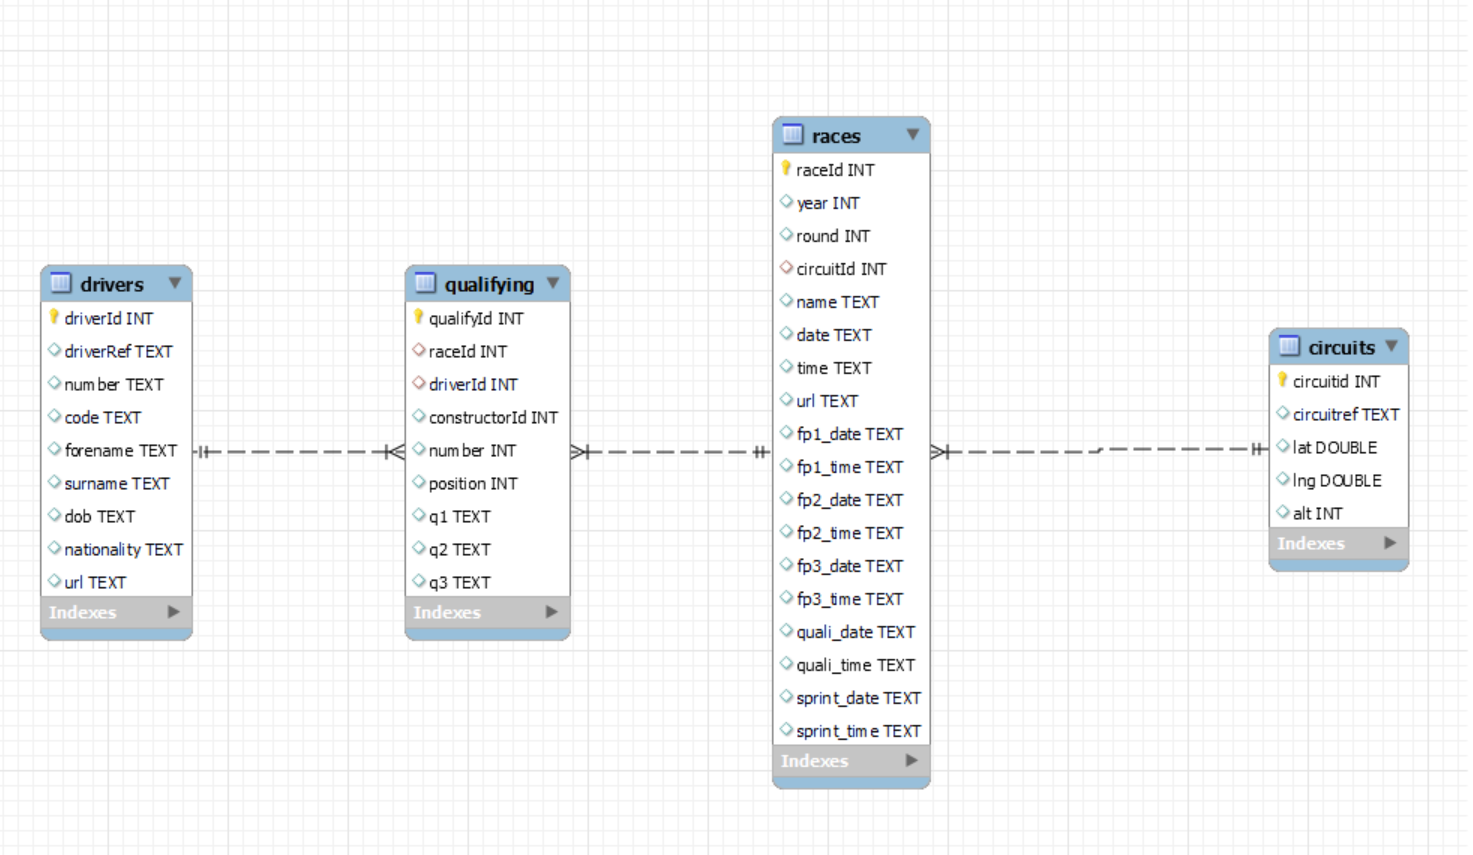